In [1]:
# Necessary Imports
import pandas as pd
import csv
import warnings
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.linear_model import LinearRegression

In [2]:
# Read CSV
emissions_data_df = pd.read_csv("../Data/co-emissions-per-capita.csv")
emissions_data_df.head()

,Entity,Code,Year,Per capita CO₂ emissions (tonnes per capita)
0,Afghanistan,AFG,1949,0.001912
1,Afghanistan,AFG,1950,0.010871
2,Afghanistan,AFG,1951,0.011684
3,Afghanistan,AFG,1952,0.011544
4,Afghanistan,AFG,1953,0.013218


In [3]:
# Check Years Listed
emissions_data_df.groupby(["Year"]).groups.keys()

dict_keys([1751, 1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809, 1810, 1811, 1812, 1813, 1814, 1815, 1816, 1817, 1818, 1819, 1820, 1821, 1822, 1823, 1824, 1825, 1826, 1827, 1828, 1829, 1830, 1831, 1832, 1833, 1834, 1835, 1836, 1837, 1838, 1839, 1840, 1841, 1842, 1843, 1844, 1845, 1846, 1847, 1848, 1849, 1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963,

In [4]:
# Rename Columns
emissions_data_df = emissions_data_df.rename(columns = {"Per capita CO₂ emissions (tonnes per capita)" : "CO2_emissions_tons_per_capita"})
emissions_data_df.head()

,Entity,Code,Year,CO2_emissions_tons_per_capita
0,Afghanistan,AFG,1949,0.001912
1,Afghanistan,AFG,1950,0.010871
2,Afghanistan,AFG,1951,0.011684
3,Afghanistan,AFG,1952,0.011544
4,Afghanistan,AFG,1953,0.013218


In [5]:
# Group Data By Year & Total Emmissions
emissions_data_df = emissions_data_df.groupby(["Year"]).sum()
emissions_data_df.reset_index()

,Year,CO2_emissions_tons_per_capita
0,1751,0.011522
1,1800,2.309247
2,1801,2.253478
3,1802,4.337327
4,1803,2.475849
...,...,...
214,2013,893.012832
215,2014,890.230156
216,2015,901.399532
217,2016,899.315595


In [6]:
# Use iloc To Get Clean Data
emissions_data_cleaned_df = emissions_data_df.iloc[194:217, : ]
emissions_data_cleaned_df.head()

,CO2_emissions_tons_per_capita
Year,
1993,869.636645
1994,863.100924
1995,858.225479
1996,859.062572
1997,867.379574


In [7]:
# Save Clean Files To CSV Files
emissions_data_cleaned_df.to_csv("../Data/CO2_data.csv")

In [8]:
# Test Predict Linear Regression
warnings.simplefilter("ignore")
emissions_df = pd.read_csv("../Data/CO2_data.csv")
emissions_df.head()

,Year,CO2_emissions_tons_per_capita
0,1993,869.636645
1,1994,863.100924
2,1995,858.225479
3,1996,859.062572
4,1997,867.379574


In [9]:
emissions_df.dtypes

Year                               int64
CO2_emissions_tons_per_capita    float64
dtype: object

In [10]:
# Convert Values Into Array
X = emissions_df.iloc[:, 0].values.reshape(-1, 1)

# Calculate Dimension Of Rows
Y = emissions_df.iloc[:, 1].values.reshape(-1, 1)

# Create Object For Class
linear_regressor = LinearRegression()

# Perform Linear Regression
linear_regressor.fit(X, Y)

# Make Predictions
Y_pred = linear_regressor.predict(X)

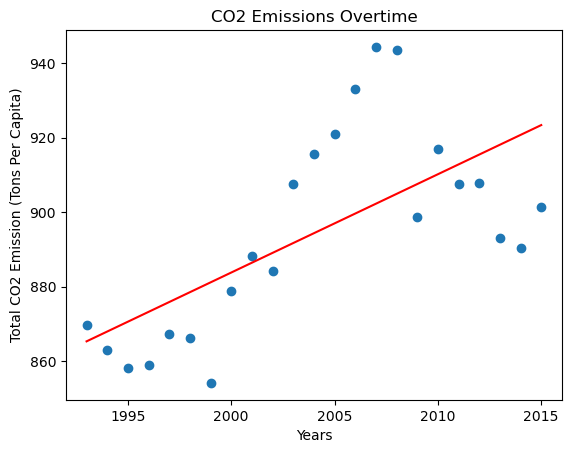

In [11]:
#Plot 
plt.scatter(X, Y)
plt.plot(X, Y_pred, color = "red")
plt.xlim(1992, 2016)
plt.xlabel("Years")
plt.ylabel("Total CO2 Emission (Tons Per Capita)")
plt.title("CO2 Emissions Overtime")
fig1 = plt.gcf()
fig1.savefig("../Images/CO2EmissionOverTime.png")

In [12]:
# Select Range For Years
ppm = pd.read_csv("../Data/co-emissions-per-capita.csv")
ppm = ppm[ppm["Year"] >= 1993].groupby(["Year"]).sum()

In [13]:
# Rename Columns
ppm = ppm.rename(columns = {"Per capita CO₂ emissions (tonnes per capita)" : "CO2_concentration_per_million"})

# Save Cleaned Files To CSV Files
ppm.to_csv("../Data/co2_ppm.csv")

# Display DataFrame
ppm_cleaned_df = ppm.reset_index()
ppm_cleaned_df

,Year,CO2_concentration_per_million
0,1993,869.636645
1,1994,863.100924
2,1995,858.225479
3,1996,859.062572
4,1997,867.379574
5,1998,866.162913
6,1999,854.147358
7,2000,878.764146
8,2001,888.096012
9,2002,884.272209


In [14]:
# Convert Values Into Array
X = ppm_cleaned_df.iloc[:, 0].values.reshape(-1, 1)

# Calculate Dimension Of Rows
Y = ppm_cleaned_df.iloc[:, 1].values.reshape(-1, 1)

# Create Object For Class
linear_regressor = LinearRegression()

# Perform Linear Regression
linear_regressor.fit(X, Y)

# Make Predictions
Y_pred = linear_regressor.predict(X)

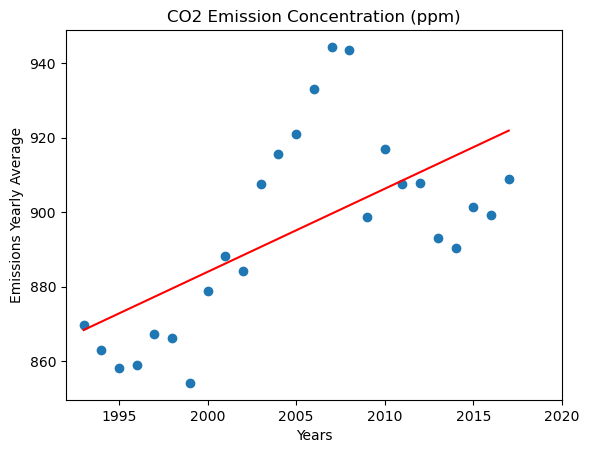

In [15]:
#Plot 
plt.scatter(X, Y)
plt.plot(X, Y_pred, color = "red")
plt.xlim(1992, 2020)
plt.xlabel("Years")
plt.ylabel("Emissions Yearly Average")
plt.title("CO2 Emission Concentration (ppm)")
fig1 = plt.gcf()
fig1.savefig("../Images/CO2EmissionsPPM.png")